In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df=pd.read_csv("regression_datasets_large.xlsx - Taxi_Fare.csv")
df

,Trip_ID,Distance_km,Fare_Rs,Duration_min,Traffic_Level,Driver_Rating,Payment_Type,Day_of_Week,Time_of_Day,Weather
0,1,9.735319,116.472746,44.746874,High,4.563782,Wallet,Fri,Afternoon,Rainy
1,2,10.326559,400.736005,98.813482,Low,4.531717,Cash,Fri,Night,Clear
2,3,20.979714,295.256653,58.673731,High,4.383311,Wallet,Tue,Afternoon,Clear
3,4,31.169312,190.422112,13.823125,High,4.931278,Wallet,Sun,Night,Rainy
4,5,2.717575,169.682559,24.096040,Low,3.787111,Card,Fri,Evening,Rainy
...,...,...,...,...,...,...,...,...,...,...
195,196,18.411235,359.017167,90.063533,Low,3.615638,Cash,Wed,Night,Cloudy
196,197,25.132111,485.330244,75.411713,High,3.482330,Card,Sun,Afternoon,Clear
197,198,26.949243,653.010389,6.917719,Low,3.467135,Card,Sat,Morning,Cloudy
198,199,20.527726,322.587786,27.398952,Medium,3.136373,Card,Sun,Morning,Cloudy


In [4]:
X = df[["Distance_km"]].values  
y = df["Fare_Rs"].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

y_pred = model.predict(X)
res = np.sum((y - y_pred) ** 2)
tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (res / tot)

print("Slope:",slope)
print("Intercept:",intercept)
print("R²:",r2)

Slope: 0.33207510272661767
Intercept: 457.58335442769203
R²: 0.00030895628960569965


In [5]:
predicted_fare= model.predict(np.array([[15]]))[0]
print("Predicted Fare for 15 km : ₹",predicted_fare)

Predicted Fare for 15 km : ₹ 462.5644809685913


In [11]:
print(f"Base Fare (Fixed Cost): ₹{model.intercept_:.2f}")
print(f"Fare per km: ₹{model.coef_[0]:.2f}")

Base Fare (Fixed Cost): ₹457.58
Fare per km: ₹0.33


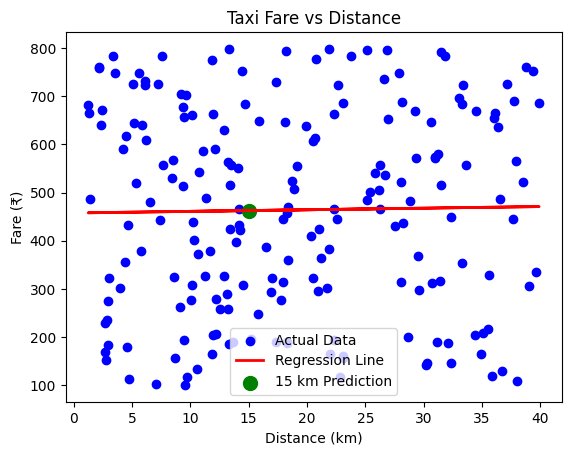

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Actual Data')

plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')

plt.scatter([15], [predicted_fare], color='green', s=100, label='15 km Prediction')

plt.xlabel('Distance (km)')
plt.ylabel('Fare (₹)')
plt.title('Taxi Fare vs Distance')
plt.legend()
plt.show()